# Análise descritiva para modelos de regressão

Nesse módulo discutiremos algumas técnicas de análise descritiva específicas para situações em que temos uma variável de interesse (variável resposta) contínua. É uma boa prática colocar a variável de interesse no eixo **Y** (vertical) de um gráfico de dispersão, deixando a variável explicativa no eixo **X** (horizontal).

### Pontos discrepantes - *Outlier*

**O que é um *outlier*?**  
De forma intuitiva, é uma observação com valor muito *diferente* das demais. Esse *diferente* pode ter vários significados, em que destaco dois:

- Outlier univariado: uma observação em que o valor de uma variável é bem mais distante da média que as demais observações - poderiamos citar uma pessoa com altura de 2,1 metros.   
- Outlier multivariado: uma observação sem necessariamente um valor isolado que chame a atenção, mas com uma combinação de variáveis com valores 'estranhos' como altura = 1,85 metros e peso = 55 Kg. Isoladamente os valores podem ser relativamente comuns, mas devido a uma estrutura de correlação natural entre as variáveis, a combinação se torna bastante incomum.

**Por que ocorre um outlier?**  
Outliers podem ocorrer por diversos motivos, incluindo erro nos dados, uma observação realmente diferente (eu 
gosto de pensar que se o Silvio Santos estiver na minha base, na maioria dos casos será um outlier), ou é comum também assimetrias causarem a "impressão" de outliers. Vamos discutir assimetria mais adiante.

**Qual a consequência de um outlier?**  
As consequências mais comuns são distorções dos dados. Valores muito altos tendem a deslocar a média para cima, inflacionar a variância e eventualmente ser **pontos influentes** em modelos de regressão.

Vamos ver um exemplo bem simples.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fixing random state for reproducibility
np.random.seed(2360873)
N = 100

,x,y
x,1.000000,-0.979782
y,-0.979782,1.000000


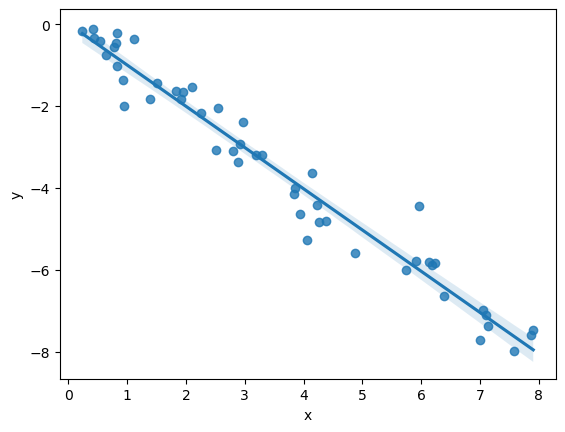

In [2]:
N = 50
x = 0 + 8*np.random.rand(N)
y = -1*x + np.random.randn(N)*.4
df8 = pd.DataFrame({'x':x, 'y':y})

_ = sns.regplot(x='x', y='y', data = df8)
df8.corr()

,x,y
x,1.000000,-0.345804
y,-0.345804,1.000000


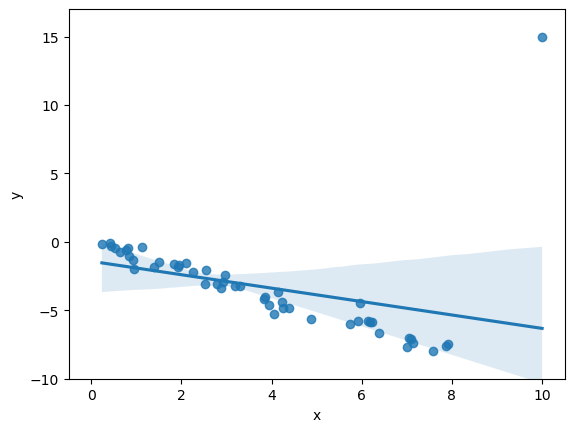

In [3]:
df8.iloc[10,0] = 10
df8.iloc[10,1] = 15

_ = sns.regplot(x='x', y='y', data = df8)
plt.xlim(-.5, 10.5)
plt.ylim(-10, 17)
df8.corr()

### Consequências

Repare esse outlier introduzido artificialmente, e na influência que ele teve no coeficiente de correlação e na reta de tendência (falaremos mais dessa reta adiante, ficamos por enquanto com o conceito intuitivo dela).

**O que fazer**?

Outliers podem ter influências importantes sobre modelos, cabendo sempre um julgamento subjetivo que deve ser ponderado dependendo da situação. Algumas alternativas comuns ao se lidar com outliers são:

- **Remover da análise**: Essa alternativa pode remover a influência do outlier da amostra, é interessante se pensarmos principalmente que o outlier é proveniente de um erro de digitação. Mesmo quando o ponto é de fato um ponto aberrante, a nossa análise pode resultar em um ajuste melhor para "a maioria" dos pontos sem o ponto aberrante do que com a presença dele.

- **Utilizar uma técnica robusta**: técnicas robustas se baseiam em estratégias para dar 'menos influência' a valores discrepantes. Existem várias delas, vamos discutir a técnica baseada nos *rankings* (alguns autores traduzem para "postos"). Um ranking se obtém ordenando-se a base de dados pelo valor da variável, e utilizando o índice ordinal da variável (de 1 a N: 1 para o menor, 2 para o segundo menor, etc até N para o maior valor). Ao utilizarmos *rankings*, não temos mais a influência de outliers - embora perca-se informação da variável - ou seja, há prós e contras na técnica.

- **Utilizar uma transformação na variável resposta**: uma transformação que merece destaque é o *LOG*, pois transforma uma característica aditiva em multiplicativa. Se pensarmos em uma bactéria em ambiente propício, que se divide em 2 a cada período, vamos observar a quantidade de bactérias e o seu logaritmo na base 2 assim:

| tempo | número de bactérias | $log_2$(número) |
|-|-|-|
| 1 | 1 | 0 |
| 2 | 2 | 1 |
| 3 | 4 | 2 |
| 4 | 8 | 3 |
| 5 | 16 | 4 |
| 6 | 32 | 5 |

Repare que $2^2=1$ implica em $log_2(2)= 1$. Repare também que a série no log tem sempre incrementos constantes, ao passo que a série do número de bactérias sempre dobra a cada passo. É isso o que o log faz: transforma uma característica multiplicativa em aditiva.

Várias quantidades tem natureza multiplicativa. Destaco o dinheiro: se aplicamos 100 dinheiros a 1% de taxa, temos 101 dinheiros no final do período. Aplicando 1000 dinheiros na mesma taxa, temos 1010 dinheiros no final do período. O log tem um efeito muito interessante em variáveis assim.

OBS: Em geral usa-se a base neperiana para o log, mas o mesmo ocorre 

nan

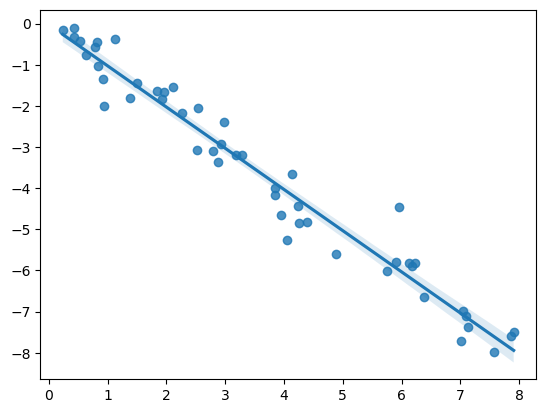

In [4]:
# Removendo o outlier
x[10] = np.nan
y[10] = np.nan
_ = sns.regplot(x=x, y=y)
np.corrcoef(x,y)[1,0]

O exemplo abaixo possui a variável ```y``` assimétrica (com valores altos sendo observados mais longe da média). Um método comum como o do boxplot indicaria diversos outliers. Podemos utilizar os ranks para avaliar a associação de forma robusta, ou seja, sem que os outliers tenham grande impacto sobre a análise.

,x,y
x,1.000000,0.737849
y,0.737849,1.000000


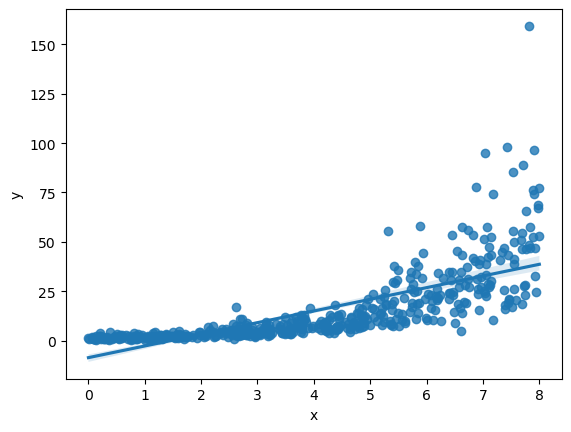

In [7]:
N = 500
x = 0 + 8*np.random.rand(N)
y = np.exp(.5*x + np.random.randn(N)*.5)
df4 = pd.DataFrame({'x':x, 'y':y})

_ = sns.regplot(x='x', y='y', data=df4)
df4.corr()

In [6]:
df4_rank = pd.concat([df4, df4.rank()], axis=1)

df4_rank.columns = ['x', 'y', 'x_rank', 'y_rank']
df4_rank

,x,y,x_rank,y_rank
0,5.227523,9.104613,324.0,291.0
1,7.691733,49.790572,483.0,478.0
2,3.968229,9.435206,254.0,295.0
3,5.245445,8.685102,326.0,284.0
4,6.255265,37.664050,394.0,457.0
...,...,...,...,...
495,3.470055,8.491271,225.0,279.0
496,2.449671,1.162069,172.0,33.0
497,0.976264,1.298636,61.0,39.0
498,7.415624,32.215414,470.0,436.0


,x,y,x_rank,y_rank
x,1.000000,0.602881,0.999312,0.922948
y,0.602881,1.000000,0.599926,0.651044
x_rank,0.999312,0.599926,1.000000,0.922277
y_rank,0.922948,0.651044,0.922277,1.000000


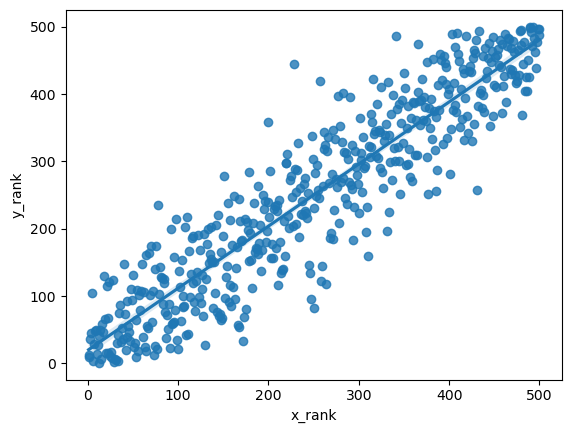

In [8]:
_ = sns.regplot(x='x_rank', y='y_rank', data=df4_rank)
df4_rank.corr()

#### Logaritmo

| tempo | Número de bactérias | $$LOG _2$$ |
|-|-|-|
| 1 | 1 | 0 |
| 2 | 2 | 1 |
| 3 | 4 | 2 |
| 4 | 8 | 3 |
| 5 | 16 | 4 |
| 6 | 32 | 5 |
| 2 | 64 | 6 |







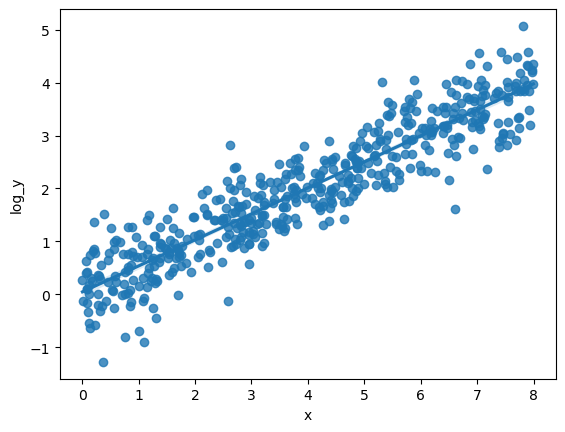

In [9]:
df4_log = df4.copy()
df4_log['log_y'] = np.log(df4_log['y'])

_ = sns.regplot(x='x', y='log_y', data=df4_log)

In [11]:
df4_log.corr()

,x,y,log_y
x,1.000000,0.737849,0.922896
y,0.737849,1.000000,0.823783
log_y,0.922896,0.823783,1.000000
